In [12]:
import catalyst

# Register the catalyst magic
%load_ext catalyst

# Setup matplotlib to display graphs inline in this Notebook
%matplotlib inline

The catalyst extension is already loaded. To reload it, use:
  %reload_ext catalyst


Running in backtesting mode.


[2019-04-03 03:31:16.450972] INFO: run_algo: Catalyst version 0.5.21
[2019-04-03 03:31:16.452442] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2019-04-03 03:31:19.456660] INFO: run_algo: running algo in backtest mode
[2019-04-03 03:31:19.468838] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2019-04-03 03:31:22.843820] INFO: Performance: Simulated 850 trading days out of 850.
[2019-04-03 03:31:22.844824] INFO: Performance: first open: 2015-03-02 00:00:00+00:00
[2019-04-03 03:31:22.845448] INFO: Performance: last close: 2017-06-28 23:59:00+00:00


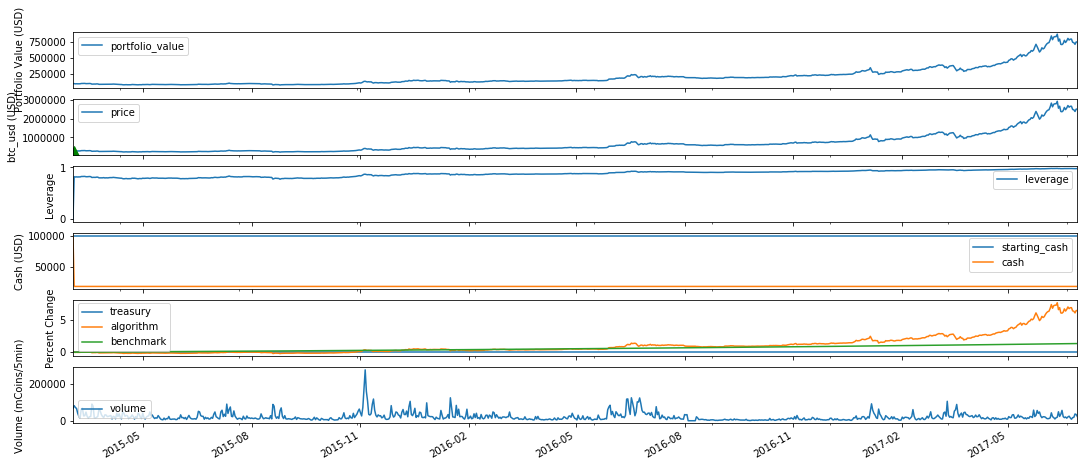

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,cash,ending_cash,ending_exposure,...,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,volume,treasury,algorithm,benchmark
2015-03-02 23:59:00+00:00,NaN,0.000000,None,0.001000,NaN,None,0.000000,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,1,[],0.001,67168.440498,0.001,0.000000,0.001000
2015-03-03 23:59:00+00:00,0.019291,-0.001719,None,0.002001,0.000000e+00,None,-82000.196604,17999.803396,17999.803396,81828.340723,...,100000.0,0.000000,0.000000,2,"[{'amount': 288.3818175264049, 'dt': 2015-03-0...",0.001,81226.398297,0.001,-0.001719,0.002001
2015-03-04 23:59:00+00:00,0.268353,-0.031768,None,0.003003,0.000000e+00,None,0.000000,17999.803396,17999.803396,78823.402184,...,100000.0,81828.340723,81828.340723,3,[],0.001,71521.587766,0.001,-0.031768,0.003003
2015-03-05 23:59:00+00:00,0.288228,-0.019194,None,0.004006,0.000000e+00,None,0.000000,17999.803396,17999.803396,80080.746909,...,100000.0,78823.402184,78823.402184,4,[],0.001,66108.884634,0.001,-0.019194,0.004006
2015-03-06 23:59:00+00:00,0.256028,-0.031681,None,0.005010,0.000000e+00,None,0.000000,17999.803396,17999.803396,78832.053639,...,100000.0,80080.746909,80080.746909,5,[],0.001,40276.571970,0.001,-0.031681,0.005010
2015-03-07 23:59:00+00:00,0.254303,-0.021271,None,0.006015,0.000000e+00,None,0.000000,17999.803396,17999.803396,79873.112000,...,100000.0,78832.053639,78832.053639,6,[],0.001,22856.945604,0.001,-0.021271,0.006015
2015-03-08 23:59:00+00:00,0.232174,-0.025251,None,0.007021,0.000000e+00,None,0.000000,17999.803396,17999.803396,79475.145089,...,100000.0,79873.112000,79873.112000,7,[],0.001,13853.794890,0.001,-0.025251,0.007021
2015-03-09 23:59:00+00:00,0.349691,0.019189,None,0.008028,0.000000e+00,None,0.000000,17999.803396,17999.803396,83919.108900,...,100000.0,79475.145089,79475.145089,8,[],0.001,62908.377680,0.001,0.019189,0.008028
2015-03-10 23:59:00+00:00,0.327277,0.023861,None,0.009036,0.000000e+00,None,0.000000,17999.803396,17999.803396,84386.287445,...,100000.0,83919.108900,83919.108900,9,[],0.001,67389.782195,0.001,0.023861,0.009036
2015-03-11 23:59:00+00:00,0.311427,0.035339,None,0.010045,3.628434e-18,None,0.000000,17999.803396,17999.803396,85534.047078,...,100000.0,84386.287445,84386.287445,10,[],0.001,25811.471790,0.001,0.035339,0.010045


In [13]:
%%catalyst --start 2015-3-2 --end 2017-6-28 --capital-base 100000 -x bitfinex -c usd

from catalyst.finance.slippage import VolumeShareSlippage

from catalyst.api import (
    order_target_value,
    symbol,
    record,
    cancel_order,
    get_open_orders,
)

def initialize(context):
    context.ASSET_NAME = 'btc_usd'
    context.TARGET_HODL_RATIO = 0.8
    context.RESERVE_RATIO = 1.0 - context.TARGET_HODL_RATIO

    # For all trading pairs in the poloniex bundle, the default denomination
    # currently supported by Catalyst is 1/1000th of a full coin. Use this
    # constant to scale the price of up to that of a full coin if desired.
    context.TICK_SIZE = 1000.0

    context.is_buying = True
    context.asset = symbol(context.ASSET_NAME)

    context.i = 0

def handle_data(context, data):
    context.i += 1

    starting_cash = context.portfolio.starting_cash
    target_hodl_value = context.TARGET_HODL_RATIO * starting_cash
    reserve_value = context.RESERVE_RATIO * starting_cash

    # Cancel any outstanding orders
    orders = get_open_orders(context.asset) or []
    for order in orders:
        cancel_order(order)

    # Stop buying after passing the reserve threshold
    cash = context.portfolio.cash
    if cash <= reserve_value:
        context.is_buying = False

    # Retrieve current asset price from pricing data
    price = data.current(context.asset, 'price')

    # Check if still buying and could (approximately) afford another purchase
    if context.is_buying and cash > price:
        # Place order to make position in asset equal to target_hodl_value
        order_target_value(
            context.asset,
            target_hodl_value,
            limit_price=price*1.1,
        )

    record(
        price=price,
        volume=data.current(context.asset, 'volume'),
        cash=cash,
        starting_cash=context.portfolio.starting_cash,
        leverage=context.account.leverage,
    )

def analyze(context=None, results=None):
    import matplotlib.pyplot as plt

    # Plot the portfolio and asset data.
    ax1 = plt.subplot(611)
    results[['portfolio_value']].plot(ax=ax1)
    ax1.set_ylabel('Portfolio Value (USD)')

    ax2 = plt.subplot(612, sharex=ax1)
    ax2.set_ylabel('{asset} (USD)'.format(asset=context.ASSET_NAME))
    (context.TICK_SIZE * results[['price']]).plot(ax=ax2)

    trans = results.ix[[t != [] for t in results.transactions]]
    buys = trans.ix[
        [t[0]['amount'] > 0 for t in trans.transactions]
    ]
    ax2.plot(
        buys.index,
        context.TICK_SIZE * results.price[buys.index],
        '^',
        markersize=10,
        color='g',
    )

    ax3 = plt.subplot(613, sharex=ax1)
    results[['leverage', 'alpha', 'beta']].plot(ax=ax3)
    ax3.set_ylabel('Leverage ')

    ax4 = plt.subplot(614, sharex=ax1)
    results[['starting_cash', 'cash']].plot(ax=ax4)
    ax4.set_ylabel('Cash (USD)')

    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]] = results[[
        'treasury_period_return',
        'algorithm_period_return',
        'benchmark_period_return',
    ]]

    ax5 = plt.subplot(615, sharex=ax1)
    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]].plot(ax=ax5)
    ax5.set_ylabel('Percent Change')

    ax6 = plt.subplot(616, sharex=ax1)
    results[['volume']].plot(ax=ax6)
    ax6.set_ylabel('Volume (mCoins/5min)')

    plt.legend(loc=3)

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()